In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Available GPU(s):", tf.config.list_physical_devices('GPU'))
print("Is cuDNN enabled:", tf.test.is_built_with_cuda())


TensorFlow version: 2.10.1
Available GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is cuDNN enabled: True


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

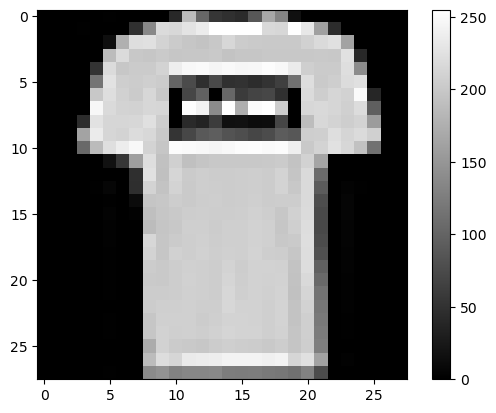

In [4]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 1

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_labels[data_idx]


0

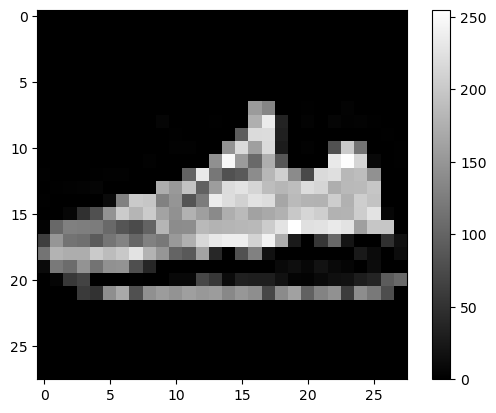

In [6]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
valid_labels[data_idx]

7

In [8]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

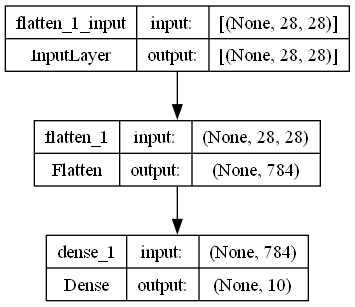

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(
    train_images,
    train_labels,
    epochs=50,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 16.7127 - accuracy: 0.7450 - val_loss: 17.3755 - val_accuracy: 0.7415
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 12.1248 - accuracy: 0.7880 - val_loss: 13.6496 - val_accuracy: 0.7905
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 11.3283 - accuracy: 0.7970 - val_loss: 9.7210 - val_accuracy: 0.8068
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 11.0439 - accuracy: 0.7980 - val_loss: 11.9828 - val_accuracy: 0.7919
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 10.5462 - accuracy: 0.8042 - val_loss: 16.5300 - val_accuracy: 0.7420
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 9.9544 - accuracy: 0.8040 - val_loss: 12.2034 - val_accuracy: 0.7936
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 10.1519 - accuracy: 0.8058 - val_loss: 10.6599 -

In [24]:
model.predict(train_images[0:10])

1/1 [==============================] - 0s 110ms/step


array([[ 9.1379692e+01, -9.2666162e+02,  1.1447593e+02,  1.8472185e+02,
         9.1484261e+01,  1.0524633e+03,  3.4710849e+02,  9.1500439e+02,
         5.2157709e+02,  1.5216434e+03],
       [ 9.0229535e+02, -1.4401724e+01,  5.7284747e+02,  6.3400824e+02,
         3.7642258e+02, -2.6047944e+03,  6.1770209e+02, -3.7540205e+03,
         1.5344054e+02, -9.7051324e+02],
       [ 2.9227191e+02,  1.8586621e+02,  2.1323015e+02,  3.1170126e+02,
         2.3143266e+02, -6.8778900e+02,  2.2126479e+02, -1.2782970e+03,
        -3.3215649e+00, -3.3617068e+02],
       [ 4.7869205e+02,  2.3855353e+02,  3.8669000e+02,  4.8467749e+02,
         3.3128397e+02, -1.1882448e+03,  4.1921094e+02, -2.2592810e+03,
        -2.5223890e+01, -1.5395670e+03],
       [ 6.0664581e+02,  4.9702890e+02,  3.8482712e+02,  6.2807404e+02,
         5.0533246e+02, -1.3605680e+03,  4.2373434e+02, -1.5578252e+03,
         1.3541646e+02, -1.5841949e+03],
       [ 7.6348480e+02,  3.2868185e+02,  8.0112054e+02,  6.8349341e+02,
   

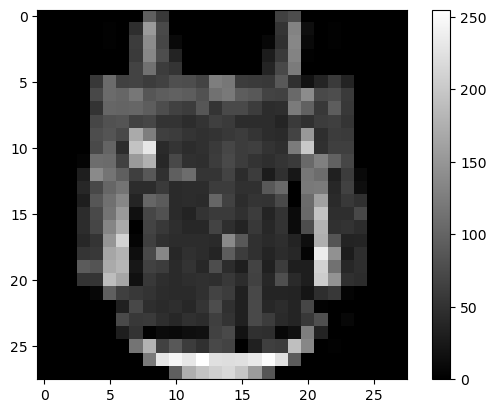

1/1 [==============================] - 0s 31ms/step


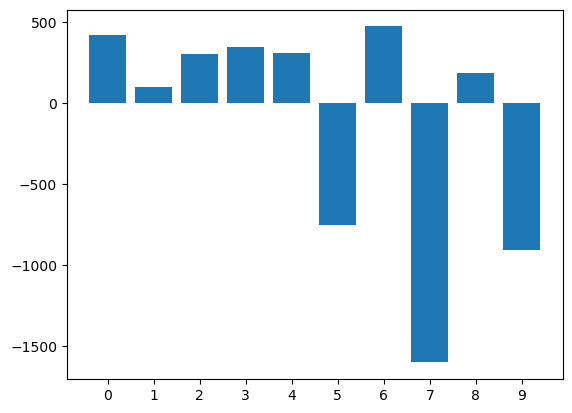

correct answer: 6


In [25]:
data_idx = 8675 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])